## How much do probe readings drift? What is the associated error?

Looking at calibrations that are relevant to Chapter 4 of my thesis: August 17th and August 9th.

Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe P21

In [18]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
from numpy.polynomial import polynomial as Poly
import pandas as pd
import scipy.io as sio
import seaborn as sns
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(15, color=col, linestyle=':')
    ax.axvline(21.0+15, color=col, linestyle=':')
    ax.axvline(71.0+15, color=col, linestyle=':')


In [6]:
# Read density of saline solutions
df17 = pd.read_csv('../calibration_17aug19/calibration.csv')
df09 = pd.read_csv('../calibration_09aug19/calibration.csv')

In [7]:
# Read conduino measurements and the average 500 nsamples
nums = ['100','090','080','070','060','050','040','030','020','010','000']
file_num = len(nums)

# August 17
mean_read_ch1_17 = np.zeros(file_num)
std_read_ch1_17 = np.zeros(file_num)
mean_read_ch2_17 = np.zeros(file_num)
std_read_ch2_17 = np.zeros(file_num)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_17aug19/%spc.mat' %num
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1_17[ii] = np.mean(ch1)
    std_read_ch1_17[ii] = np.std(ch1)
    
    mean_read_ch2_17[ii] = np.mean(ch2)
    std_read_ch2_17[ii] = np.std(ch2)

# August 9
mean_read_ch1_09 = np.zeros(file_num)
std_read_ch1_09 = np.zeros(file_num)
mean_read_ch2_09 = np.zeros(file_num)
std_read_ch2_09 = np.zeros(file_num)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_09aug19/%spc.mat' %num
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1_09[ii] = np.mean(ch1)
    std_read_ch1_09[ii] = np.std(ch1)
    
    mean_read_ch2_09[ii] = np.mean(ch2)
    std_read_ch2_09[ii] = np.std(ch2)
 

In [8]:
# Fit 3rd deg polynomial
coef1_17, stats1_17 = Poly.polyfit(mean_read_ch1_17[:],np.array(df17.density)[:],3,full=True)
coef2_17, stats2_17 = Poly.polyfit(mean_read_ch2_17[:],np.array(df17.density)[:],3,full=True)

coef1_09, stats1_09 = Poly.polyfit(mean_read_ch1_09[:],np.array(df09.density)[:],3,full=True)
coef2_09, stats2_09 = Poly.polyfit(mean_read_ch2_09[:],np.array(df09.density)[:],3,full=True)

read_dummy = np.linspace(0,4.8,30)

fit1_17 = coef1_17[0]+(coef1_17[1]*read_dummy)+(coef1_17[2]*read_dummy**2) + (coef1_17[3]*read_dummy**3)
fit2_17 = coef2_17[0]+(coef2_17[1]*read_dummy)+(coef2_17[2]*read_dummy**2) + (coef2_17[3]*read_dummy**3)

fit1_09 = coef1_09[0]+(coef1_09[1]*read_dummy)+(coef1_09[2]*read_dummy**2) + (coef1_09[3]*read_dummy**3)
fit2_09 = coef2_09[0]+(coef2_09[1]*read_dummy)+(coef2_09[2]*read_dummy**2) + (coef2_09[3]*read_dummy**3)

# vector to calculate rmse
vec1_17 = coef1_17[0]+(coef1_17[1]*mean_read_ch1_17)+(coef1_17[2]*mean_read_ch1_17**2) + (coef1_17[3]*mean_read_ch1_17**3)
vec2_17 = coef2_17[0]+(coef2_17[1]*mean_read_ch2_17)+(coef2_17[2]*mean_read_ch2_17**2) + (coef2_17[3]*mean_read_ch2_17**3)

vec1_09 = coef1_09[0]+(coef1_09[1]*mean_read_ch1_09)+(coef1_09[2]*mean_read_ch1_09**2) + (coef1_09[3]*mean_read_ch1_09**3)
vec2_09 = coef2_09[0]+(coef2_09[1]*mean_read_ch2_09)+(coef2_09[2]*mean_read_ch2_09**2) + (coef2_09[3]*mean_read_ch2_09**3)

rmse_1_17 = (mean_squared_error(vec1_17, np.array(df17.density)[:]))**(0.5)
rmse_2_17 = (mean_squared_error(vec2_17, np.array(df17.density)[:]))**(0.5)
rmse_1_09 = (mean_squared_error(vec1_09, np.array(df09.density)[:]))**(0.5)
rmse_2_09 = (mean_squared_error(vec2_09, np.array(df09.density)[:]))**(0.5)

print('rmse are:')
print(rmse_1_17, rmse_2_17, rmse_1_09, rmse_2_09)

rmse are:
0.0010812513188054186 0.0008326668323341193 0.0003050796344691602 0.00013413378221801463


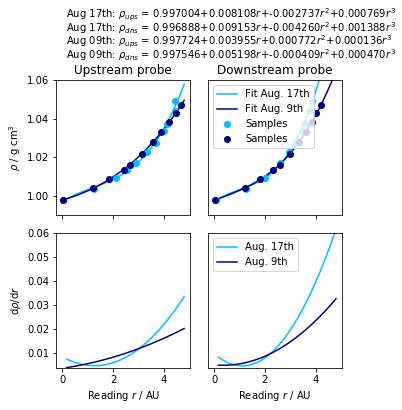

In [9]:
# Check what is the uncertainty of the densimeter

fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(5,5), sharex=True)

ax0.errorbar(mean_read_ch1_17, df17.density, xerr=std_read_ch1_17, yerr=0.00005,
             marker='o', linewidth=0, color='deepskyblue', label='Measurements')
ax0.plot(read_dummy, fit1_17, '-',color='deepskyblue', label='Fitted function')
ax0.fill_between(read_dummy, fit1_17-rmse_1_17, fit1_17+rmse_1_17,
                 color='0.9',alpha=0.2)

ax1.errorbar(mean_read_ch2_17, df17.density, xerr=std_read_ch2_17,yerr=0.00005, 
             marker='o',linewidth=0,  color='deepskyblue', label='Samples')
ax1.plot(read_dummy, fit2_17, '-',color='deepskyblue', label='Fit Aug. 17th')
ax1.fill_between(read_dummy, fit2_17-rmse_2_17, fit2_17+rmse_2_17,
                 color='0.9',alpha=0.2)

ax0.errorbar(mean_read_ch1_09,df09.density, xerr=std_read_ch1_09,yerr=0.00005, 
             marker='o',linewidth=0,  color='navy', label='Measurements ')
ax0.plot(read_dummy, fit1_09, '-',color='navy', label='Measurements')
ax0.fill_between(read_dummy, fit1_09-rmse_1_09, fit1_09+rmse_1_09,
                 color='0.9',alpha=0.2)

ax1.errorbar(mean_read_ch2_09,df09.density, xerr=std_read_ch2_09, yerr=0.00005,
             marker='o',linewidth=0,  color='navy', label='Samples')
ax1.plot(read_dummy, fit2_09, '-',color='navy', label='Fit Aug. 9th')
ax1.fill_between(read_dummy, fit2_09-rmse_2_09, fit2_09+rmse_2_09,
                 color='0.9',alpha=0.2)


ax2.plot(read_dummy[1:],(fit1_17[1:]-fit1_17[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='deepskyblue', label='Aug. 17th')
ax2.plot(read_dummy[1:],(fit1_09[1:]-fit1_09[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='navy', label='Aug. 9th')

ax3.plot(read_dummy[1:],(fit2_17[1:]-fit2_17[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='deepskyblue', label='Aug. 17th')
ax3.plot(read_dummy[1:],(fit2_09[1:]-fit2_09[:-1])/(read_dummy[1:]-read_dummy[:-1]),
         '-',color='navy', label='Aug. 9th')

ax0.text(0.07,1.46,r'Aug 17th: $\rho_{ups}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef1_17[0], coef1_17[1], coef1_17[2], coef1_17[3]),
         transform=ax0.transAxes)
ax0.text(0.07,1.36,r'Aug 17th: $\rho_{dns}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef2_17[0], coef2_17[1], coef2_17[2], coef2_17[3]),
         transform=ax0.transAxes)
ax0.text(0.07,1.26,r'Aug 09th: $\rho_{ups}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef1_09[0], coef1_09[1], coef1_09[2], coef1_09[3]),
         transform=ax0.transAxes)
ax0.text(0.07,1.16,r'Aug 09th: $\rho_{dns}$ = %f+%f$r$+%f$r^2$+%f$r^3$' %(coef2_09[0], coef2_09[1], coef2_09[2], coef2_09[3]),
         transform=ax0.transAxes)

ax0.set_ylabel(r'$\rho$ / g cm$^3$')
ax2.set_xlabel(r'Reading $r$ / AU')
ax3.set_xlabel(r'Reading $r$ / AU')
ax2.set_ylabel(r'd$\rho$/d$r$')
ax0.set_title('Upstream probe')
ax1.set_title('Downstream probe')
ax0.set_ylim(0.99,1.06)
ax1.set_ylim(0.99,1.06)
ax2.set_ylim(0.004,0.06)
ax3.set_ylim(0.004,0.06)
ax1.set_yticks([])
ax3.set_yticks([])
ax1.legend()
ax3.legend()
plt.tight_layout()

In [10]:
# Function for del rho
del_rho = interp1d(read_dummy[1:],(fit1_17[1:]-fit1_17[:-1])/(read_dummy[1:]-read_dummy[:-1]))

#error_rho = del_rho(3.060)*0.29

### Drift

I will define the uncertainty assocuated to the readings as the mean drift of all base readings. That is, for a given base reading file, the drift is $abs(r(t=0 min)-r(t=7 min))$. The mean drift is then the mean of the drifts of all base reading files for one probe.

In [27]:
sns.set_style('whitegrid')

mean drift upstream is 0.015714
mean drift downstream is 0.013886


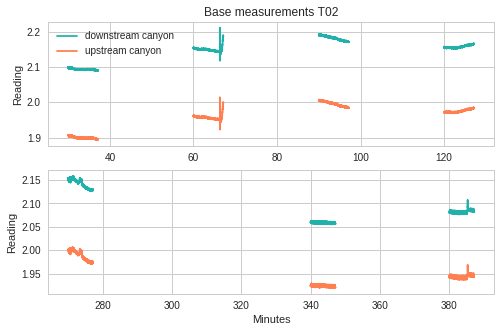

In [44]:
fig,ax = plt.subplots(2,1,figsize=(8,5))
nums = ['01','02','03','04','08','10','12']
ini_times = [30,60,90,120,4.5*60,40+300,360+20]
drift_1 = np.zeros(len(nums))
drift_2 = np.zeros(len(nums))

sns.set_palette('plasma',n_colors=len(ini_times))
for num, ini_time, ii in zip(nums, ini_times, range(file_num)):
    filepath = '../../experiments/exp_01aug19/%s_base.mat' %num
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    time = mat['time']/60
    drift_1[ii] = np.abs(ch1[0]-ch1[-1])
    drift_2[ii] = np.abs(ch2[0]-ch2[-1])
    if ini_time < 4.5*60:
        ax[0].plot(time+ini_time, ch1, color='coral', label='upstream probe')
        ax[0].plot(time+ini_time, ch2, color='lightseagreen', label='downstream probe')
    else:
        ax[1].plot(time+ini_time, ch1, color='coral')
        ax[1].plot(time+ini_time, ch2, color='lightseagreen')
    ax[0].set_ylabel('Reading')
    ax[1].set_ylabel('Reading')
    ax[1].set_xlabel('Minutes')

legend_elements = [Line2D([0], [0], color='lightseagreen', label='downstream canyon'),
                   Line2D([0], [0], color='coral', label='upstream canyon'),
                   ]

ax[0].legend(handles=legend_elements)
ax[0].set_title('Base measurements T02')
print('mean drift upstream is %f' %(np.nanmean(drift_1)))
print('mean drift downstream is %f' %(np.nanmean(drift_2)))
plt.savefig('../../notebooks/figures/app_drift_T02.eps', format='eps', transparent=False, bbox_inches='tight')

In [9]:
# The uncertainty associated to rho can then be calculated as:
r0 = 2.15 #some reading
rho_r0 = coef1_17[0]+(coef1_17[1]*r0)+(coef1_17[2]*r0**2) + (coef1_17[3]*r0**3)
error_rho_r0 = del_rho(r0)*np.nanmean(drift_1)
print('rho=%f +/- %f' %(rho_r0,error_rho_r0))

# the uncertainty associated to the change in density is:
r1 = 2.0 # some readings
r2 = 2.17
rho_r1 = coef1_17[0]+(coef1_17[1]*r1)+(coef1_17[2]*r1*2) + (coef1_17[3]*r1**3)
rho_r2 = coef1_17[0]+(coef1_17[1]*r2)+(coef1_17[2]*r2**2) + (coef1_17[3]*r2**3)
error_rho_r1 = del_rho(r1)*np.nanmean(drift_1)
error_rho_r2 = del_rho(r2)*np.nanmean(drift_1)

print(r'\Delta \rho=%f +/- %f' %((rho_r2-rho_r1),(error_rho_r1**2+error_rho_r2**2)**0.5))

rho=1.009428 +/- 0.000105
\Delta \rho=0.001144 +/- 0.000143


### Get drift of all experiments

In [41]:
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools

# Information for all runs is stored in experiment_dictionaries.py
lib_path = os.path.abspath('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts') # Add absolute path to my python scripts
sys.path.append(lib_path)

import experiment_dictionaries as exdic

In [42]:
exp_dicts = [exdic.T01,exdic.T02,exdic.T03,exdic.T04,exdic.T05,exdic.T06,exdic.T07,exdic.T08,
             exdic.T09,exdic.T10,exdic.T11,exdic.T12, exdic.DYE02,exdic.S01,exdic.S02,exdic.S03,exdic.S04,exdic.S05,
             exdic.S06,exdic.S07,exdic.S08,exdic.S09,exdic.S10,exdic.S11,exdic.S12]
exp_num = len(exp_dicts) # number of experiment dictionaries

The mean drift upstream for exp in 31Jul19 is 0.011517
The mean drift downstream for exp in 31Jul19 is 0.006217
The mean drift upstream for exp in 01Aug19 is 0.015714
The mean drift downstream for exp in 01Aug19 is 0.013886
The mean drift upstream for exp in 05Aug19 is 0.002025
The mean drift downstream for exp in 05Aug19 is 0.004600
The mean drift upstream for exp in 07Aug19 is 0.010975
The mean drift downstream for exp in 07Aug19 is 0.003575
The mean drift upstream for exp in 08Aug19 is 0.009700
The mean drift downstream for exp in 08Aug19 is 0.003425
The mean drift upstream for exp in 10Aug19 is 0.006257
The mean drift downstream for exp in 10Aug19 is 0.007557
The mean drift upstream for exp in 13Aug19 is 0.044957
The mean drift downstream for exp in 13Aug19 is 0.030843
The mean drift upstream for exp in 15Aug19 is 0.005775
The mean drift downstream for exp in 15Aug19 is 0.003700
The mean drift upstream for exp in 17Aug19 is 0.005880
The mean drift downstream for exp in 17Aug19 is 0

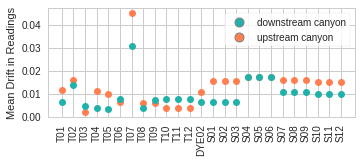

In [43]:
fig, (ax0) = plt.subplots(1, 1, figsize=(5.5,2))
exp_names = ['T01','T02','T03','T04','T05','T06','T07','T08','T09','T10','T11','T12','DYE02','S01','S02','S03','S04',
             'S05','S06','S07','S08','S09','S10','S11','S12']
for exp, kk in zip(exp_dicts, range(exp_num)):
    drift1 = np.zeros(len(exp['base_files']))
    drift2 = np.zeros(len(exp['base_files']))
    
    for ii in range(len(exp['base_files'])):
        filepath = '../'+exp['dir']+exp['base_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        drift1[ii] = np.abs(P1[0]-P1[-1])
        drift2[ii] = np.abs(P2[0]-P2[-1])
    
    mean_drift1 = np.mean(drift1)
    mean_drift2 = np.mean(drift2)
    print('The mean drift upstream for exp in %s is %f' %(exp['date'], mean_drift1))
    print('The mean drift downstream for exp in %s is %f' %(exp['date'], mean_drift2))
    
    ax0.plot(kk, mean_drift1 ,'o',color='coral', label='Upstream canyon')
    ax0.plot(kk, mean_drift2 ,'o',color='lightseagreen', label='Downstream canyon')
   
legend_elements = [Line2D([0], [0], marker='o', color='w', label='downstream canyon',
                          markerfacecolor='lightseagreen',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   Line2D([0], [0], marker='o', color='w', label='upstream canyon',
                          markerfacecolor='coral',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   ]
ax0.legend(handles=legend_elements, loc=1,frameon=True )    
ax0.set_xticks(range(len(exp_dicts)))
ax0.set_xticklabels(exp_names, rotation = 90)
ax0.set_ylabel('Mean Drift in Readings')  
plt.savefig('../../notebooks/figures/mean_drift_probes.eps', format='eps', transparent=False, bbox_inches='tight')

I saved the output above in the dictionary of each experiment as drift_ups and drift_dns

### Use mean drift and derivative of calibration curve to calculate time series error

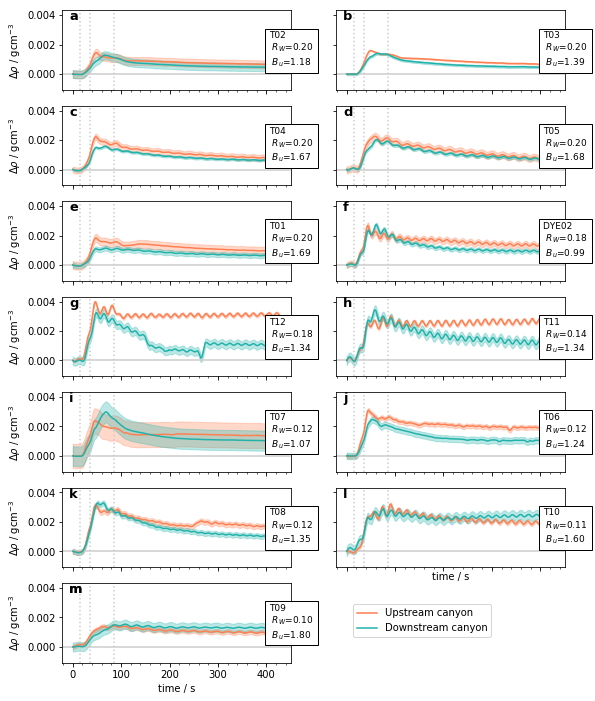

In [11]:
exp_Norder = [exdic.T02,exdic.T03,exdic.T04,exdic.T05,exdic.T01,
             exdic.DYE02,exdic.T12,exdic.T11,exdic.T07,exdic.T06,
             exdic.T08,exdic.T10, exdic.T09]
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11),(ax12,ax13)) = plt.subplots(7, 2, figsize=(9,12), 
                                                                                    sharey=True, sharex=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

filepath =  '../'+exdic.T01['dir']+ exdic.T01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
exp_names = ['T02','T03', 'T04', 'T05', 'T01','DYE02', 'T12', 'T11', 
            'T07', 'T06','T08', 'T10',  'T09']
                              
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    probe1 = np.zeros((len(time),len(exp['run_files'])))
    probe2 = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
  
    Navg = np.ones((4))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = '../'+exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ctools.errorANK1_09Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_09Aug19(P2)*exp["drift_dns"]        
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ctools.errorANK1_17Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_17Aug19(P2)*exp["drift_dns"]  
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        probe1[:,ii] = ctools.filter_timeseries((dens1[:]-dens1[0]),winlen=win)
        probe2[:,ii] = ctools.filter_timeseries((dens2[:]-dens2[0]),winlen=win)
        error1[:,ii] = err1+err1[0]
        error2[:,ii] = err2+err2[0]    
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    W = 5 # W at half length (cm)
    Bu = (N*exp["hsb"])/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)
    Fr = exp["U"]/(N*exp["hsb"])
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    ax.text(0.905,0.3,'%s \n $R_W$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Bu), transform=ax.transAxes,fontsize=9,
            bbox=dict(facecolor='white', alpha=1) )
    avg1 = np.nanmean(probe1, axis=1)
    std1 = np.nanstd(probe1, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
     
    ax.plot(time, avg1,'-',color='coral', label='Upstream canyon')
    ax.fill_between(time,avg1+avg_err1, avg1-avg_err1,color='coral', alpha=0.3)
    
    avg2 = np.nanmean(probe2, axis=1)
    std2 = np.nanstd(probe2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    ax.plot(time, avg2 ,'-',color='lightseagreen', label='Downstream canyon')
    ax.fill_between(time,avg2+avg_err2, avg2-avg_err2,color='lightseagreen', alpha=0.3)
 
    ax.text(0.03,0.88, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.set_xticklabels([])
ax.text(0.03,0.88, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)

ax13.axis("off")
for ax in [ax0,ax2,ax4,ax6,ax8, ax10,ax12]:
    ax.set_ylabel(r'$\Delta \rho$ / gcm$^{-3}$')
ax12.set_xlabel('time / s')
ax11.set_xlabel('time / s')
ax12.set_xticks([0,100,200,300,400])
ax11.set_xticks([0,100,200,300,400])
ax12.set_xticklabels(['0','100','200','300','400'])
ax11.set_xticklabels(['0','100','200','300','400'])
ax12.legend(bbox_to_anchor=(1.25,0.8))
plt.savefig('../../notebooks/figures/twocanyon_timeseries_uncertainty.pdf', format='pdf',
            transparent=False, bbox_inches='tight')

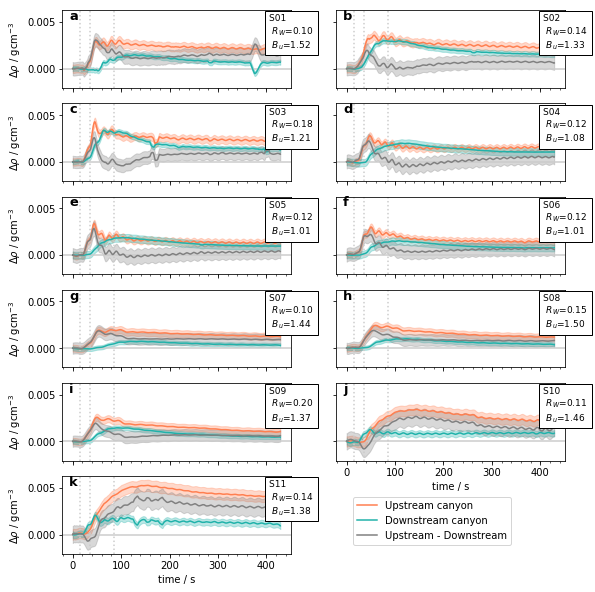

In [16]:
exp_Norder = [exdic.S01,exdic.S02,exdic.S03,exdic.S04,exdic.S05,
              exdic.S06,exdic.S07,exdic.S08,exdic.S09,exdic.S10,exdic.S11,exdic.S12]
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(9,10), 
                                                                                    sharey=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

filepath =  '../'+exdic.S01['dir']+ exdic.S01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b','c','d','e','f','g','h','i','j','k','l']
exp_names = ['S01','S02', 'S03', 'S04', 'S05','S06', 'S07', 'S08', 
            'S09', 'S10','S11', 'S12']
                              
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    probe1 = np.zeros((len(time),len(exp['run_files'])))
    probe2 = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
  
    Navg = np.ones((4))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = '../'+exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ((ctools.errorANK1_09Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_09Aug19(P2)*exp["drift_dns"])**2)**0.5 
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ((ctools.errorANK1_17Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_17Aug19(P2)*exp["drift_dns"])**2)**0.5  
            
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        probe1[:,ii] = ctools.filter_timeseries((dens1-dens1[0]), winlen=win)
        probe2[:,ii] =ctools.filter_timeseries((dens2-dens2[0]), winlen=win)
        error1[:,ii] = (err1+err1[1])
        error2[:,ii] = (err2+err2[1])    
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    W = 5 # W at half length (cm)
    Bu = (N*exp["hsb"])/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)
    Fr = exp["U"]/(N*exp["hsb"])
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    
    ax.text(0.905,0.5,'%s \n $R_W$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Bu), transform=ax.transAxes,fontsize=9,
            bbox=dict(facecolor='white', alpha=1) )
    avg1 = np.nanmean(probe1, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
     
    ax.plot(time, avg1,'-',color='coral', label='Upstream canyon')
    ax.fill_between(time,avg1+avg_err1, avg1-avg_err1,color='coral', alpha=0.3)
    
    avg2 = np.nanmean(probe2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    
    ax.plot(time, avg2 ,'-',color='lightseagreen', label='Downstream canyon')
    ax.fill_between(time,avg2+avg_err2, avg2-avg_err2,color='lightseagreen', alpha=0.3)
    
    ax.plot(time, avg1-avg2 ,'-',color='gray', label='Upstream - Downstream')
    ax.fill_between(time,(avg1-avg2)+(avg_err1+avg_err2), (avg1-avg2)-(avg_err1+avg_err2),
                    color='gray', alpha=0.3)
 
    ax.text(0.03,0.88, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.set_xticklabels([])

ax11.axis("off")
for ax in [ax0,ax2,ax4,ax6,ax8, ax10,ax12]:
    ax.set_ylabel(r'$\Delta \rho$ / gcm$^{-3}$')
ax10.set_xlabel('time / s')
ax9.set_xlabel('time / s')
ax10.set_xticks([0,100,200,300,400])
ax9.set_xticks([0,100,200,300,400])
ax10.set_xticklabels(['0','100','200','300','400'])
ax9.set_xticklabels(['0','100','200','300','400'])
ax10.legend(bbox_to_anchor=(1.25,0.8))
plt.savefig('../../notebooks/figures/onecanyon_timeseries_uncertainty.pdf', format='pdf', 
            transparent=False, bbox_inches='tight')

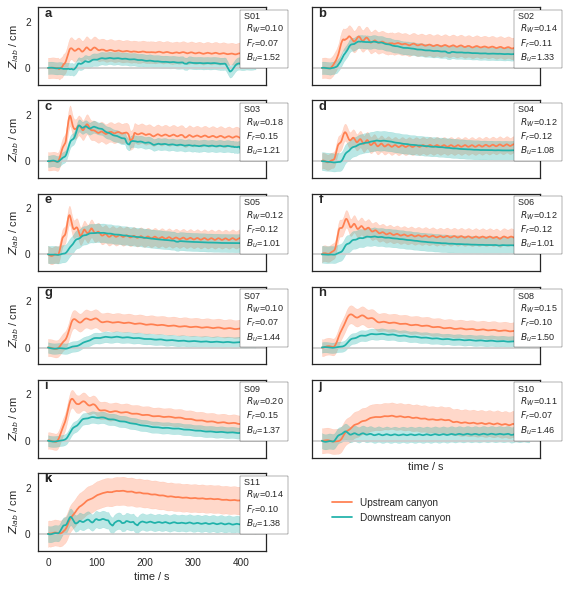

In [26]:
exp_Norder = [exdic.S01,exdic.S02,exdic.S03,exdic.S04,exdic.S05,
              exdic.S06,exdic.S07,exdic.S08,exdic.S09,exdic.S10,exdic.S11,exdic.S12]
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11)) = plt.subplots(6, 2, figsize=(9,10), 
                                                                                    sharey=True, sharex=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

filepath =  '../'+exdic.S01['dir']+ exdic.S01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b','c','d','e','f','g','h','i','j','k','l']
exp_names = ['S01','S02', 'S03', 'S04', 'S05','S06', 'S07', 'S08', 
            'S09', 'S10','S11', 'S12']
                              
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    probe1 = np.zeros((len(time),len(exp['run_files'])))
    probe2 = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
  
    Navg = np.ones((4))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = '../'+exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ((ctools.errorANK1_09Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_09Aug19(P2)*exp["drift_dns"])**2)**0.5      
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ((ctools.errorANK1_17Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_17Aug19(P2)*exp["drift_dns"])**2)**0.5  
            
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        probe1[:,ii] = 1000*ctools.filter_timeseries((dens1-dens1[0]), winlen=win)
        probe2[:,ii] = 1000*ctools.filter_timeseries((dens2-dens2[0]), winlen=win)
        error1[:,ii] = 1000*(err1+err1[0])
        error2[:,ii] = 1000*(err2+err2[0])    
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    W = 5 # W at half length (cm)
    Bu = (N*exp["hsb"])/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)
    Fr = exp["U"]/(N*exp["hsb"])
    ax.axhline(0, color='0.8')
    
    
    ax.text(0.905,0.3,'%s \n $R_W$=%1.2f \n $F_r$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Fr,Bu), transform=ax.transAxes,fontsize=9,
            bbox=dict(facecolor='white', alpha=1) )
    
    Z = 100*(g/rho0)*(probe1/N**2)
    err_Z = 100*(g/rho0)*(error1/N**2)
    avg1 = np.nanmean(Z, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
     
    ax.plot(time, avg1,'-',color='coral', label='Upstream canyon')
    #ax.fill_between(time, avg1+std1, avg1-std1, color='coral', alpha=0.3)
    ax.fill_between(time,avg1+avg_err1, avg1-avg_err1,color='coral', alpha=0.3)
    
    Z2 = 100*(g/rho0)*(probe2/N**2)
    err_Z2 = 100*(g/rho0)*(error2/N**2)
    avg2 = np.nanmean(Z2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    
    ax.plot(time, avg2 ,'-',color='lightseagreen', label='Downstream canyon')
    #ax.fill_between(time, avg2+std2, avg2-std2,color='lightseagreen', alpha=0.3)
    ax.fill_between(time,avg2+avg_err2, avg2-avg_err2,color='lightseagreen', alpha=0.3)
    
    ax.text(0.03,0.88, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)

ax.text(0.03,0.88, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)

ax11.axis("off")
for ax in [ax0,ax2,ax4,ax6,ax8, ax10,ax12]:
    ax.set_ylabel(r'$Z_{lab}$ / cm')
ax10.set_xlabel('time / s')
ax9.set_xlabel('time / s')
ax10.legend(bbox_to_anchor=(1.25,0.8))
plt.savefig('../../notebooks/figures/onecanyon_Ztimeseries_uncertainty.pdf', format='pdf', transparent=False, bbox_inches='tight')